In [1]:
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
datalocation = 'diabetes.csv'
df = pd.read_csv(datalocation) 

<AxesSubplot:>

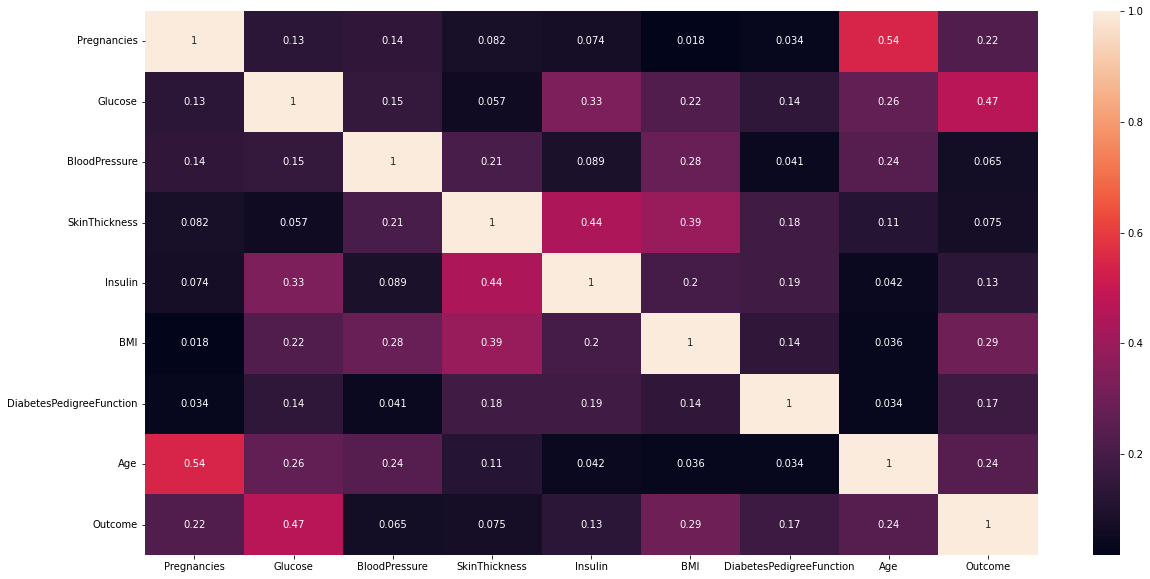

In [3]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(), annot=True)

In [4]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

=====DecisionTreeClassifier===== 

 Accuracy: 0.7586206896551724

 [[63 13]
 [15 25]] 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        76
           1       0.66      0.62      0.64        40

    accuracy                           0.76       116
   macro avg       0.73      0.73      0.73       116
weighted avg       0.76      0.76      0.76       116

=====AdaBoostClassifier===== 

 Accuracy: 0.7586206896551724

 [[61 15]
 [13 27]] 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        76
           1       0.64      0.68      0.66        40

    accuracy                           0.76       116
   macro avg       0.73      0.74      0.74       116
weighted avg       0.76      0.76      0.76       116

=====GradientBoostingClassifier===== 

 Accuracy: 0.7586206896551724

 [[58 18]
 [10 30]] 
               precision    recall  f1-score   support

           0       0.85    

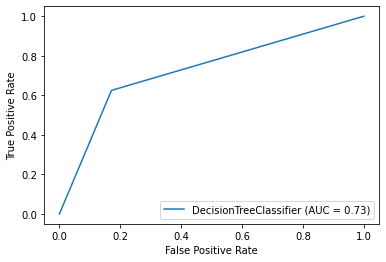

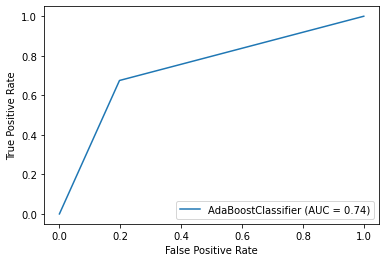

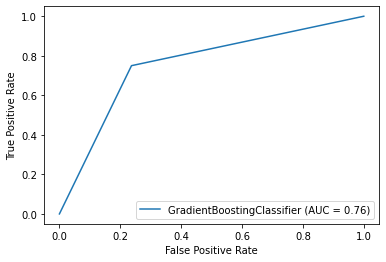

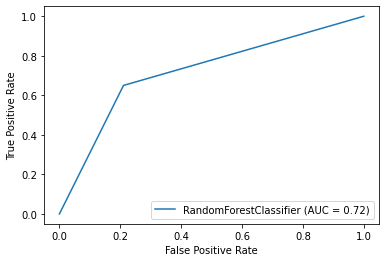

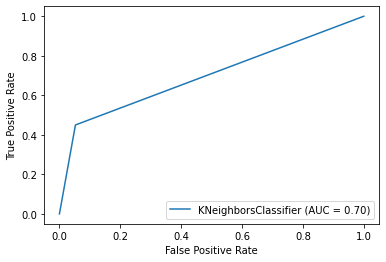

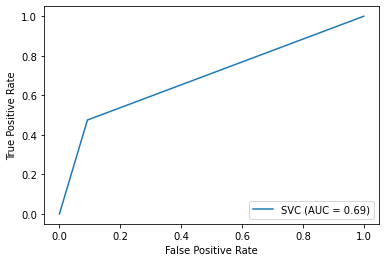

In [5]:
from sklearn import preprocessing
diabetesFeatures = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction', 'SkinThickness']
x = df[diabetesFeatures]
y = df["Outcome"]
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
from sklearn.ensemble import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, RocCurveDisplay, auc, roc_curve
from sklearn.svm import SVC
models = [
    tree.DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42),
    AdaBoostClassifier(learning_rate=0.45, n_estimators=100, random_state=42),
    GradientBoostingClassifier(learning_rate=0.45, n_estimators=100, random_state=42),
    RandomForestClassifier(n_estimators=15, random_state=42),
    KNeighborsClassifier(n_neighbors=100),
    SVC(kernel="poly")
]
results = {}
for clf in models:
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    name = str(type(clf).__name__)
    results[name] = score
    print(color.BOLD + "="*5 + name + "="*5 + color.END, "\n\n", "Accuracy:", score)
    predictions = clf.predict(x_test)
    print("\n", confusion_matrix(y_test, predictions), "\n", classification_report(y_test, predictions))
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=name)
    display.plot()
    print(color.BOLD + "="*50 + color.END)
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1])} # sort by accuracy

In [6]:
results

{'RandomForestClassifier': 0.7413793103448276,
 'DecisionTreeClassifier': 0.7586206896551724,
 'AdaBoostClassifier': 0.7586206896551724,
 'GradientBoostingClassifier': 0.7586206896551724,
 'SVC': 0.7586206896551724,
 'KNeighborsClassifier': 0.7758620689655172}